In [1]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = 10,10
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel('./econo_columns_20170510-20220509.xlsx', engine = "openpyxl")

In [5]:
news_words = bkp.keyword_parser(df['키워드'])

In [6]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [7]:
perplexity = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict, passes=15)
    perplexity.append(ldamodel.log_perplexity(corpus))

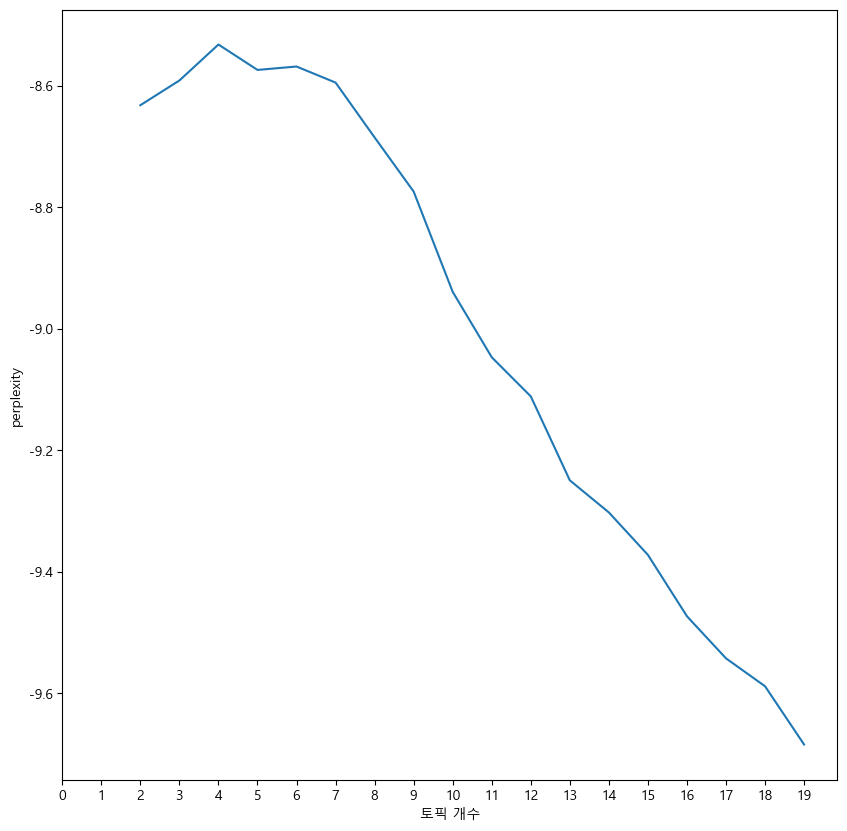

In [34]:
x = range(2,20)
plt.plot(x,perplexity)
plt.xlabel("토픽 개수")
plt.ylabel("perplexity")
plt.xticks(range(20), range(20))
plt.show()

In [35]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict, passes=15)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

KeyboardInterrupt: 

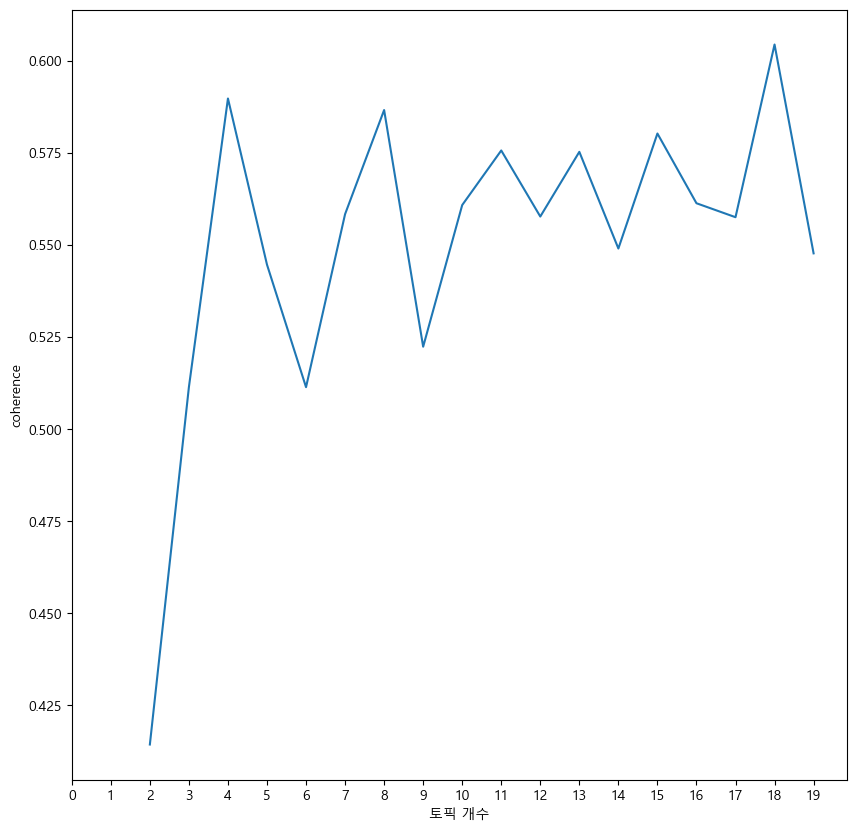

In [33]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.xticks(range(20), range(20))
plt.show()

In [29]:
coherence

[0.414343956000938,
 0.5113868926837938,
 0.5897360394322002,
 0.5446278166079266,
 0.511364459190836,
 0.5583388613437144,
 0.5866014273514812,
 0.5223491929687815,
 0.5608058748487318,
 0.5756250993677064,
 0.5576873875032368,
 0.5752549941952076,
 0.5490060412133813,
 0.5802302194858664,
 0.5612989878982546,
 0.5575081006356551,
 0.6043909699530863,
 0.5476905942145738]

In [ ]:
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=15, iterations=100)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

In [ ]:
pyLDAvis.save_html(vis, 'economic_LDA.html') #LDAvis save

In [ ]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

In [ ]:
news_topic_df = pd.concat([df[['제목', '언론사']],topictable['주요 토픽']], axis = 1)

In [ ]:
news_topic_df.to_excel("./news_topic.xlsx")